# Notebook example

Installing some necessary packages:

In [1]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Failed to fetch package metadata for '@jupyter-widgets/jupyterlab-manager': URLError(ConnectionResetError(104, 'Connection reset by peer'))
Failed to fetch package metadata for '@jupyter-widgets/jupyterlab-manager': URLError(gaierror(-2, 'Name or service not known'))
An error occured.
ValueError: No version of @jupyter-widgets/jupyterlab-manager could be found that is compatible with the current version of JupyterLab.

Conflicting Dependencies:
JupyterLab                        Extension      Package
>=1.2.1 <1.3.0                    >=2.0.0 <3.0.0 @jupyterlab/application
>=1.2.2 <1.3.0                    >=2.0.0 <3.0.0 @jupyterlab/notebook
>=1.2.1 <1.3.0                    >=2.0.0 <3.0.0 @jupyterlab/rendermime
>=1.5.0 <1.6.0                    >=2.0.0 <3.0.0 @jupyterlab/rendermime-interfaces
>=4.2.0 <4.3.0                    >=5.0.0 <6.0.0 @jupyterlab/services
See the log file for details:  /tmp/jupyter

In [2]:
!pip install xgboost

**It is necessary to change the working directory so the project structure works properly:**

In [1]:
import sys
sys.path.append("../../")

From this point, it's on you!

---

In [5]:
import pandas as pd
import gc
import matplotlib.pyplot as plt
import pickle
from ml.data_source.spreadsheet import Spreadsheet

In [2]:
#Leitura dos Dados já calculados
    
with open('../../../output/id_cluster.pickle', 'rb') as f:
    id_cluster = pickle.load(f)

In [15]:
#Processar o KMeans
gc.collect()
kmeans = MiniBatchKMeans(n_clusters=2000, random_state=174, batch_size=100000).fit(principal_components)
gc.collect()

0

(array([256., 393., 787., ...,  41., 158., 316.]),
 array([0.0000000e+00, 9.9950000e-01, 1.9990000e+00, ..., 1.9970010e+03,
        1.9980005e+03, 1.9990000e+03]),
 <a list of 2000 Patch objects>)

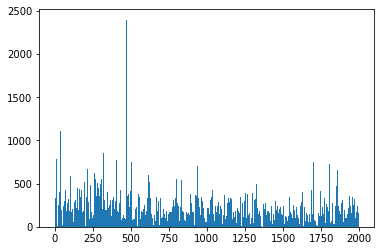

In [17]:
plt.hist(kmeans.labels_, bins = 2000)

In [6]:
#Leitura da base de clientes para testes
df01 = Spreadsheet().get_data('../../../data/raw/estaticos_portfolio1.csv')
df02 = Spreadsheet().get_data('../../../data/raw/estaticos_portfolio2.csv')
df03 = Spreadsheet().get_data('../../../data/raw/estaticos_portfolio3.csv')

df01.drop(df01.columns.difference(['id']), 1, inplace=True)
df02.drop(df02.columns.difference(['id']), 1, inplace=True)
df01.drop(df02.columns.difference(['id']), 1, inplace=True)

In [233]:
def recomender_lead_cluster(df, id_cluster):
    result = []
    for row in df.iterrows():
        identifier = row[1]['id']
        clustered_index = id_cluster[id_cluster['id'] == identifier]['kmeans'].values[0]
        result.append({'cluster_id': clustered_index, 'identifier': identifier})
    return result

In [324]:
def recomender_lead(df, id_cluster, quantityOfSample):
    cluster_list = recomender_lead_cluster(df, id_cluster)
    leads = pd.DataFrame(columns=['id'])
    for row in cluster_list:
        ids = id_cluster[id_cluster['kmeans'] == row['cluster_id']]['id']
        if (ids.count() > quantityOfSample):
            ids = ids.sample(n = quantityOfSample)
        leads = leads.append(pd.DataFrame(ids, columns=['id']),ignore_index=True) 
    leads = leads.drop_duplicates()
    return {"leads" : leads, "cluster_list" : cluster_list};

In [325]:
#Processar os testes para verificação
result01 = recomender_lead(df01, id_cluster, 10)
result02 = recomender_lead(df02, id_cluster, 10)
result03 = recomender_lead(df03, id_cluster, 10)

In [326]:
print(result01)
print(result02)
print(result03)

{'leads':                                                      id
0     fbd8231d28ef6b7ab98ed89d5bf4c216aea11d5ac72b1d...
1     ba2ca541fb47dd0b028e5a1171fd91552d36316cb333a0...
2     cc803108633da04b67032934a6dce0c4d5128ff35f9348...
3     26d9bec3a96582575e2396fc7c7deadf8713269c5e75c0...
4     827fc4709b42d427e9113fde30544eded1eeb203af1a83...
...                                                 ...
5545  e76521ab0b3794bd4e9d7a3d917287905e69f6d697e695...
5546  7bfb4bbc8fd410a99439ff82c214eb14aef140b4a28f32...
5547  b5731735a650a6711307dbc3b5cd5849c16925263c3639...
5548  c836eb8673d8b8a5dcd44cd52dad878caac1c7b8a56a1d...
5549  f7eda06d29d555711b4b696949006de7d67ef2491702e4...

[5462 rows x 1 columns], 'cluster_list': [{'cluster_id': 1319, 'identifier': 'dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255be9ea861a9e5841a9'}, {'cluster_id': 520, 'identifier': '32e5f4e10932153a7ba869cb0386e7e02d49d2461046b866411556d2af150702'}, {'cluster_id': 108, 'identifier': 'a95d6f30bba445bd3d6b0c5b36f865b38